In [54]:
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [55]:
train= pd.read_csv('dataset/train_staff.csv')
train.head()

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

      Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0  Dr. Gundalli                  F          2      31397                  7   
1  Dr. Gundalli                  F          2      31397                  7   
2     Dr. Vinay                  E          2      31397                  7   
3  Dr. Gundalli                  D          2      31397                  7   
4  Dr. Gundalli                  D          2      31397                  7   

  Type of Admission Severity of Illness  Visitors with Patient    Age  \
0         Emergency             Extreme                      2  51-60   
1            Trauma             Extreme                      2  51-60   
2            Trauma             Extreme                      2  51-60   
3            Trauma             Extreme                      2  51-60   
4            Trauma             Extreme                      2  51-60   

   Admission_Deposit   Stay  
0               4911   0-10  
1               5954  41-50  
2               4745  31-40  
3               7272  41-50  
4               5558  41-50

In [56]:
train.shape

(24, 18)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   case_id                            24 non-null     int64 
 1   Hospital_code                      24 non-null     int64 
 2   Hospital_type_code                 24 non-null     object
 3   City_Code_Hospital                 24 non-null     int64 
 4   Hospital_region_code               24 non-null     object
 5   Available Extra Rooms in Hospital  24 non-null     int64 
 6   Department                         24 non-null     object
 7   Ward_Type                          24 non-null     object
 8   Ward_Facility_Code                 24 non-null     object
 9   Bed Grade                          24 non-null     int64 
 10  patientid                          24 non-null     int64 
 11  City_Code_Patient                  24 non-null     int64 
 12  Type of Ad

In [58]:
train.describe()

case_id  Hospital_code  City_Code_Hospital  \
count  24.000000      24.000000           24.000000   
mean   12.500000      16.166667            4.958333   
std     7.071068       9.954971            2.758058   
min     1.000000       1.000000            1.000000   
25%     6.750000       7.500000            3.000000   
50%    12.500000      16.000000            5.000000   
75%    18.250000      23.750000            6.000000   
max    24.000000      32.000000           10.000000   

       Available Extra Rooms in Hospital  Bed Grade     patientid  \
count                          24.000000  24.000000     24.000000   
mean                            2.708333   2.583333  44739.083333   
std                             0.954585   0.653863  16126.100779   
min                             1.000000   1.000000  31397.000000   
25%                             2.000000   2.000000  31397.000000   
50%                             2.000000   3.000000  31397.000000   
75%                             4.000000   3.000000  63418.000000   
max                             4.000000   4.000000  63418.000000   

       City_Code_Patient  Visitors with Patient  Admission_Deposit  
count          24.000000              24.000000          24.000000  
mean            7.416667               2.083333        5922.916667  
std             0.503610               0.408248        1584.696896  
min             7.000000               2.000000        2685.000000  
25%             7.000000               2.000000        5083.500000  
50%             7.000000               2.000000        5875.500000  
75%             8.000000               2.000000        6809.750000  
max             8.000000               4.000000        9398.000000

In [59]:
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [60]:
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [61]:
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [62]:
train.drop(['case_id', 'patientid', 'Stay', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient'], axis=1, inplace=True)

In [63]:
cat_cols=[]
num_cols=[]
for col in train.columns:
    if train[col].dtypes=='object':
        cat_cols.append(col)
for col in train.columns:
    if train[col].dtypes!='object':
        num_cols.append(col)
print(cat_cols)
print(num_cols)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']
['Hospital_code', 'City_Code_Hospital', 'Visitors with Patient', 'Admission_Deposit']


In [64]:
train.head()

Hospital_code Hospital_type_code  City_Code_Hospital Hospital_region_code  \
0              8                  c                   3                    Z   
1              2                  c                   5                    Z   
2             10                  e                   1                    X   
3             26                  b                   2                    Y   
4             26                  b                   2                    Y   

     Department     Ward_Type Ward_Facility_Code Type of Admission  \
0  radiotherapy  Dr. Gundalli                  F         Emergency   
1  radiotherapy  Dr. Gundalli                  F            Trauma   
2    anesthesia     Dr. Vinay                  E            Trauma   
3  radiotherapy  Dr. Gundalli                  D            Trauma   
4  radiotherapy  Dr. Gundalli                  D            Trauma   

  Severity of Illness  Visitors with Patient    Age  Admission_Deposit  
0             Extreme                      2  51-60               4911  
1             Extreme                      2  51-60               5954  
2             Extreme                      2  51-60               4745  
3             Extreme                      2  51-60               7272  
4             Extreme                      2  51-60               5558

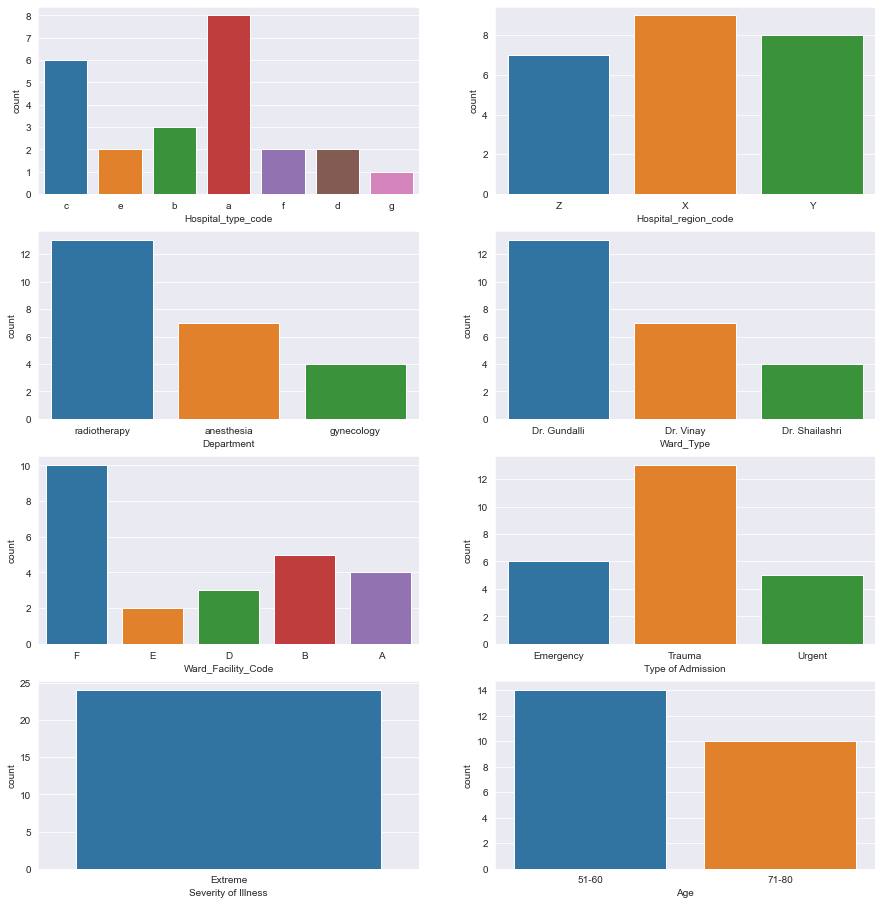

In [65]:
i=1
plt.figure(figsize=(15,20))
for col in cat_cols:
    plt.subplot(5,2,i)
    sns.countplot(train[col])
    i=i+1
plt.show()

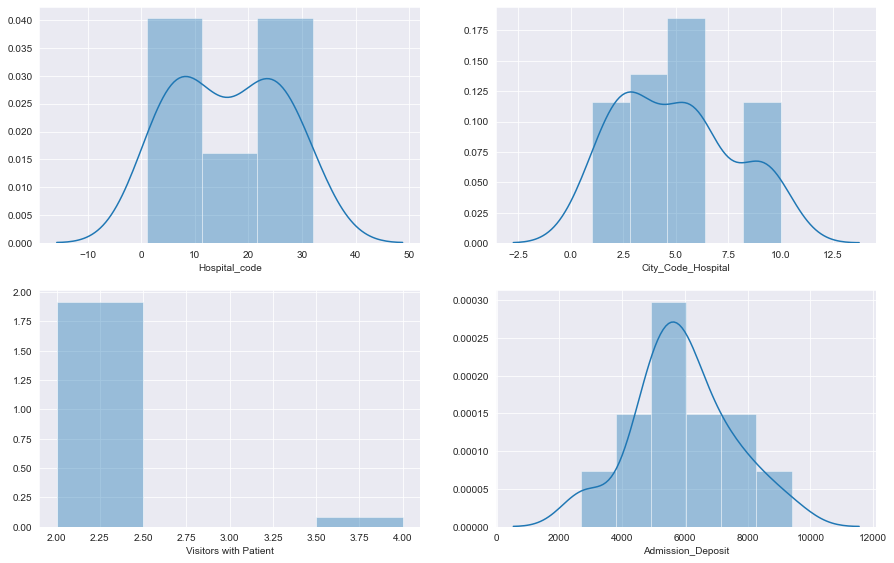

In [66]:
i=1
plt.figure(figsize=(15,20))
for col in num_cols:
    plt.subplot(4,2,i)
    sns.distplot(train[col])
    i=i+1
plt.show()

In [67]:
train['Ward_Type']

0       Dr. Gundalli
1       Dr. Gundalli
2          Dr. Vinay
3       Dr. Gundalli
4       Dr. Gundalli
5          Dr. Vinay
6       Dr. Gundalli
7       Dr. Gundalli
8     Dr. Shailashri
9     Dr. Shailashri
10      Dr. Gundalli
11      Dr. Gundalli
12      Dr. Gundalli
13      Dr. Gundalli
14    Dr. Shailashri
15    Dr. Shailashri
16      Dr. Gundalli
17         Dr. Vinay
18      Dr. Gundalli
19      Dr. Gundalli
20         Dr. Vinay
21         Dr. Vinay
22         Dr. Vinay
23         Dr. Vinay
Name: Ward_Type, dtype: object

In [68]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [69]:
cat_cols.remove('Ward_Type')

In [70]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [71]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat_cols.append('City_Code_Hospital')
for col in cat_cols:
    train[col]= le.fit_transform(train[col])

In [72]:
from joblib import dump
dump(le, 'le_encoder_staff.bin')

['le_encoder_staff.bin']

In [73]:
train[cat_cols]

Hospital_type_code  Hospital_region_code  Department  Ward_Facility_Code  \
0                    2                     2           2                   4   
1                    2                     2           2                   4   
2                    4                     0           0                   3   
3                    1                     1           2                   2   
4                    1                     1           2                   2   
5                    0                     0           0                   4   
6                    5                     1           2                   1   
7                    0                     0           2                   4   
8                    3                     1           1                   1   
9                    4                     0           1                   3   
10                   6                     1           2                   1   
11                   1                     1           2                   2   
12                   2                     2           2                   0   
13                   3                     2           2                   4   
14                   0                     0           1                   4   
15                   0                     0           1                   4   
16                   0                     0           2                   4   
17                   0                     0           0                   4   
18                   5                     1           2                   1   
19                   0                     1           2                   1   
20                   2                     2           0                   0   
21                   2                     2           0                   0   
22                   2                     2           0                   0   
23                   0                     0           0                   4   

    Type of Admission  Severity of Illness  Age  City_Code_Hospital  
0                   0                    0    0                   2  
1                   1                    0    0                   4  
2                   1                    0    0                   0  
3                   1                    0    0                   1  
4                   1                    0    0                   1  
5                   1                    0    0                   5  
6                   0                    0    0                   6  
7                   1                    0    0                   5  
8                   1                    0    0                   7  
9                   1                    0    0                   0  
10                  2                    0    0                   6  
11                  2                    0    0                   1  
12                  0                    0    0                   2  
13                  2                    0    0                   4  
14                  0                    0    1                   5  
15                  0                    0    1                   5  
16                  2                    0    1                   5  
17                  0                    0    1                   3  
18                  1                    0    1                   6  
19                  1                    0    1                   6  
20                  1                    0    1                   2  
21                  1                    0    1                   2  
22                  1                    0    1                   2  
23                  2                    0    1                   5

In [74]:
train['City_Code_Hospital'].value_counts()

5    6
2    5
6    4
1    3
4    2
0    2
7    1
3    1
Name: City_Code_Hospital, dtype: int64

In [75]:
num_cols

['Hospital_code',
 'City_Code_Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

In [76]:
num_cols.remove('City_Code_Hospital')
# num_cols.remove('Bed Grade')
num_cols

['Hospital_code', 'Visitors with Patient', 'Admission_Deposit']

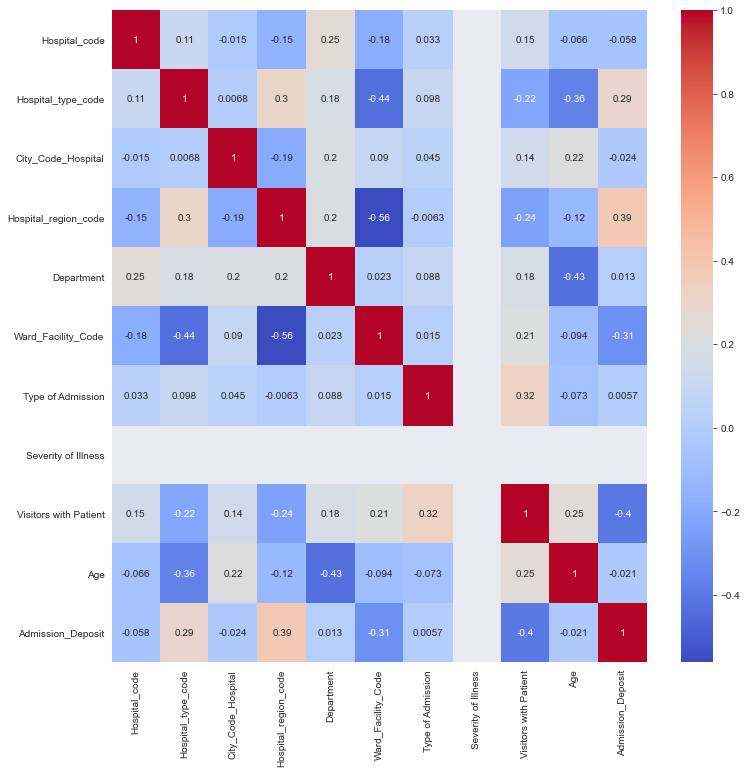

In [77]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [78]:
print(train.shape)
train.head()

(24, 12)


Hospital_code  Hospital_type_code  City_Code_Hospital  \
0              8                   2                   2   
1              2                   2                   4   
2             10                   4                   0   
3             26                   1                   1   
4             26                   1                   1   

   Hospital_region_code  Department     Ward_Type  Ward_Facility_Code  \
0                     2           2  Dr. Gundalli                   4   
1                     2           2  Dr. Gundalli                   4   
2                     0           0     Dr. Vinay                   3   
3                     1           2  Dr. Gundalli                   2   
4                     1           2  Dr. Gundalli                   2   

   Type of Admission  Severity of Illness  Visitors with Patient  Age  \
0                  0                    0                      2    0   
1                  1                    0                      2    0   
2                  1                    0                      2    0   
3                  1                    0                      2    0   
4                  1                    0                      2    0   

   Admission_Deposit  
0               4911  
1               5954  
2               4745  
3               7272  
4               5558

In [79]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
train[num_cols]= ss.fit_transform(train[num_cols].values)

In [80]:
dump(ss, 'std_scaler_staff.bin')

['std_scaler_staff.bin']

In [81]:
train[num_cols].head(5)

Hospital_code  Visitors with Patient  Admission_Deposit
0      -0.838005              -0.208514          -0.652289
1      -1.453682              -0.208514           0.020037
2      -0.632779              -0.208514          -0.759294
3       1.009026              -0.208514           0.869630
4       1.009026              -0.208514          -0.235228

In [82]:
from sklearn.model_selection import train_test_split
y= train[['Ward_Type']]
X= train.drop(['Ward_Type'], axis=1)

In [83]:
X.head()

Hospital_code  Hospital_type_code  City_Code_Hospital  \
0      -0.838005                   2                   2   
1      -1.453682                   2                   4   
2      -0.632779                   4                   0   
3       1.009026                   1                   1   
4       1.009026                   1                   1   

   Hospital_region_code  Department  Ward_Facility_Code  Type of Admission  \
0                     2           2                   4                  0   
1                     2           2                   4                  1   
2                     0           0                   3                  1   
3                     1           2                   2                  1   
4                     1           2                   2                  1   

   Severity of Illness  Visitors with Patient  Age  Admission_Deposit  
0                    0              -0.208514    0          -0.652289  
1                    0              -0.208514    0           0.020037  
2                    0              -0.208514    0          -0.759294  
3                    0              -0.208514    0           0.869630  
4                    0              -0.208514    0          -0.235228

In [84]:
y.head()

Ward_Type
0  Dr. Gundalli
1  Dr. Gundalli
2     Dr. Vinay
3  Dr. Gundalli
4  Dr. Gundalli

In [85]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

In [86]:
print(f'The shape of X_Train - {X_train.shape}')
print(f'The shape of X_test - {X_test.shape}')
print(f'The shape of y_train - {y_train.shape}')
print(f'The shape of y_test - {y_test.shape}')

The shape of X_Train - (19, 11)
The shape of X_test - (5, 11)
The shape of y_train - (19, 1)
The shape of y_test - (5, 1)


In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
xgb = XGBClassifier(n_estimators=50)
xgb.fit(X_train, y_train)

[07:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
# Saving the model
dump(xgb, 'classsifier_staff.bin')

['classsifier_staff.bin']

In [90]:
y_pred= xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[3 0 0]
 [0 1 0]
 [0 0 1]]
                precision    recall  f1-score   support

  Dr. Gundalli       1.00      1.00      1.00         3
Dr. Shailashri       1.00      1.00      1.00         1
     Dr. Vinay       1.00      1.00      1.00         1

      accuracy                           1.00         5
     macro avg       1.00      1.00      1.00         5
  weighted avg       1.00      1.00      1.00         5



In [91]:
test= pd.read_csv('dataset/test_staff.csv')
test.head()

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0   318439             21                  c                   3   
1   318440             29                  a                   4   
2   318441             26                  b                   2   
3   318442              6                  a                   6   
4   318443             28                  b                  11   

  Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                    Z                                  3  gynecology   
1                    X                                  2  gynecology   
2                    Y                                  3  gynecology   
3                    X                                  3  gynecology   
4                    X                                  2  gynecology   

      Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0  Dr. Gundalli                  A          2      17006                2.0   
1  Dr. Gundalli                  F          2      17006                2.0   
2  Dr. Gundalli                  D          4      17006                2.0   
3  Dr. Gundalli                  F          2      17006                2.0   
4  Dr. Gundalli                  F          2      17006                2.0   

  Type of Admission Severity of Illness  Visitors with Patient    Age  \
0         Emergency            Moderate                      2  71-80   
1            Trauma            Moderate                      4  71-80   
2         Emergency            Moderate                      3  71-80   
3            Trauma            Moderate                      3  71-80   
4            Trauma            Moderate                      4  71-80   

   Admission_Deposit  
0               3095  
1               4018  
2               4492  
3               4173  
4               4161

In [92]:
test.shape

(24, 17)

In [93]:
test.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    7
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [94]:
test['City_Code_Patient'].fillna(statistics.mode(test['City_Code_Patient']),inplace=True)

In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            24 non-null     int64  
 1   Hospital_code                      24 non-null     int64  
 2   Hospital_type_code                 24 non-null     object 
 3   City_Code_Hospital                 24 non-null     int64  
 4   Hospital_region_code               24 non-null     object 
 5   Available Extra Rooms in Hospital  24 non-null     int64  
 6   Department                         24 non-null     object 
 7   Ward_Type                          24 non-null     object 
 8   Ward_Facility_Code                 24 non-null     object 
 9   Bed Grade                          24 non-null     int64  
 10  patientid                          24 non-null     int64  
 11  City_Code_Patient                  24 non-null     float64
 

In [96]:
test.drop(['case_id', 
           'patientid', 
           'Available Extra Rooms in Hospital', 
           'Bed Grade', 
           'City_Code_Patient', 
           'Ward_Type',
           ], axis=1, inplace=True
         )

In [97]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'City_Code_Hospital']

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Hospital_code          24 non-null     int64 
 1   Hospital_type_code     24 non-null     object
 2   City_Code_Hospital     24 non-null     int64 
 3   Hospital_region_code   24 non-null     object
 4   Department             24 non-null     object
 5   Ward_Facility_Code     24 non-null     object
 6   Type of Admission      24 non-null     object
 7   Severity of Illness    24 non-null     object
 8   Visitors with Patient  24 non-null     int64 
 9   Age                    24 non-null     object
 10  Admission_Deposit      24 non-null     int64 
dtypes: int64(4), object(7)
memory usage: 2.2+ KB


In [99]:
print(cat_cols)
for col in cat_cols:
    test[col]= le.fit_transform(test[col])

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'City_Code_Hospital']


In [100]:
test[num_cols]= ss.transform(test[num_cols].values)

In [101]:
test

Hospital_code  Hospital_type_code  City_Code_Hospital  \
0        0.495962                   2                   2   
1        1.316865                   0                   3   
2        1.009026                   1                   1   
3       -1.043231                   0                   4   
4        1.214252                   1                   7   
5        0.701188                   0                   4   
6        1.009026                   1                   1   
7        0.906413                   3                   0   
8        0.701188                   0                   4   
9        0.701188                   0                   4   
10      -0.632779                   3                   0   
11      -1.248456                   0                   3   
12      -0.017102                   2                   2   
13       1.214252                   1                   7   
14       0.290736                   0                   5   
15       1.009026                   1                   1   
16       0.290736                   0                   5   
17       1.009026                   1                   1   
18       0.701188                   0                   4   
19       0.906413                   3                   0   
20       1.624703                   4                   6   
21       1.009026                   1                   1   
22      -0.530166                   1                   1   
23      -1.043231                   0                   4   

    Hospital_region_code  Department  Ward_Facility_Code  Type of Admission  \
0                      2           1                   0                  0   
1                      0           1                   5                  1   
2                      1           1                   3                  0   
3                      0           1                   5                  1   
4                      0           1                   5                  1   
5                      0           1                   5                  1   
6                      1           1                   3                  1   
7                      0           1                   4                  0   
8                      0           1                   5                  1   
9                      0           1                   5                  2   
10                     0           1                   4                  1   
11                     0           1                   5                  0   
12                     2           1                   0                  1   
13                     0           1                   5                  2   
14                     1           1                   2                  0   
15                     1           1                   3                  0   
16                     1           1                   2                  0   
17                     1           1                   3                  1   
18                     0           0                   5                  0   
19                     0           0                   4                  1   
20                     1           1                   1                  2   
21                     1           1                   3                  2   
22                     1           1                   3                  2   
23                     0           0                   5                  0   

    Severity of Illness  Visitors with Patient  Age  Admission_Deposit  
0                     0              -0.208514    2          -1.822897  
1                     0               4.795832    2          -1.227924  
2                     0               2.293659    2          -0.922380  
3                     0               2.293659    2          -1.128010  
4                     0               4.795832    2          -1.135745  
5                     0              -0.208514    2          -0.

In [102]:
predictions= xgb.predict(test)

In [103]:
np. set_printoptions(threshold=np. inf)
print(predictions)

['Dr. Shailashri' 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Shailashri'
 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Shailashri'
 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Shailashri'
 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Shailashri'
 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Vinay' 'Dr. Vinay'
 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Vinay']


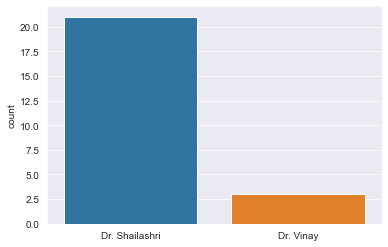

In [104]:
sns.countplot(predictions)

In [105]:
# Training Samples
temp = pd.read_csv('dataset/test_staff.csv')
temp.head().T

0             1             2  \
case_id                                  318439        318440        318441   
Hospital_code                                21            29            26   
Hospital_type_code                            c             a             b   
City_Code_Hospital                            3             4             2   
Hospital_region_code                          Z             X             Y   
Available Extra Rooms in Hospital             3             2             3   
Department                           gynecology    gynecology    gynecology   
Ward_Type                          Dr. Gundalli  Dr. Gundalli  Dr. Gundalli   
Ward_Facility_Code                            A             F             D   
Bed Grade                                     2             2             4   
patientid                                 17006         17006         17006   
City_Code_Patient                             2             2             2   
Type of Admission                     Emergency        Trauma     Emergency   
Severity of Illness                    Moderate      Moderate      Moderate   
Visitors with Patient                         2             4             3   
Age                                       71-80         71-80         71-80   
Admission_Deposit                          3095          4018          4492   

                                              3             4  
case_id                                  318442        318443  
Hospital_code                                 6            28  
Hospital_type_code                            a             b  
City_Code_Hospital                            6            11  
Hospital_region_code                          X             X  
Available Extra Rooms in Hospital             3             2  
Department                           gynecology    gynecology  
Ward_Type                          Dr. Gundalli  Dr. Gundalli  
Ward_Facility_Code                            F             F  
Bed Grade                                     2             2  
patientid                                 17006         17006  
City_Code_Patient                             2             2  
Type of Admission                        Trauma        Trauma  
Severity of Illness                    Moderate      Moderate  
Visitors with Patient                         3             4  
Age                                       71-80         71-80  
Admission_Deposit                          4173          4161

In [106]:
temp.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                              int64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                      int64
dtype: object